# 1.Data Loading


In [ ]:
#Import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, StratifiedKFold, RepeatedStratifiedKFold
from sklearn.metrics import mean_absolute_error, accuracy_score, roc_curve, auc
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

import imblearn
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

#models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier


#metrics
from imblearn.over_sampling import RandomOverSampler
from sklearn import metrics
from numpy import mean
from sklearn.utils import class_weight
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_curve


In [ ]:
#Data Gathering 
df = pd.read_csv('brain_stroke.csv')
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [ ]:
# Data Description
df.info

<bound method DataFrame.info of       gender   age  hypertension  heart_disease ever_married      work_type  \
0       Male  67.0             0              1          Yes        Private   
1       Male  80.0             0              1          Yes        Private   
2     Female  49.0             0              0          Yes        Private   
3     Female  79.0             1              0          Yes  Self-employed   
4       Male  81.0             0              0          Yes        Private   
...      ...   ...           ...            ...          ...            ...   
4976    Male  41.0             0              0           No        Private   
4977    Male  40.0             0              0          Yes        Private   
4978  Female  45.0             1              0          Yes       Govt_job   
4979    Male  40.0             0              0          Yes        Private   
4980  Female  80.0             1              0          Yes        Private   

     Residence_type

# 2. Data Preparation


####2.1. Check Missing Value

In [ ]:
df.isnull().any()

gender               False
age                  False
hypertension         False
heart_disease        False
ever_married         False
work_type            False
Residence_type       False
avg_glucose_level    False
bmi                  False
smoking_status       False
stroke               False
dtype: bool

#### 2.2 Check Correlation



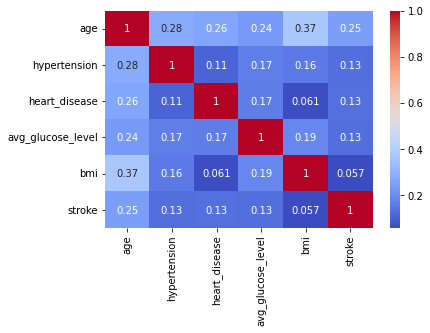

In [ ]:
# Using seaborn for plotting correlation to check if this dataset has similar varible we need to drop
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')

 1) Age is the most correlated to the stroke.

#### 2.3 Data Visualization

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


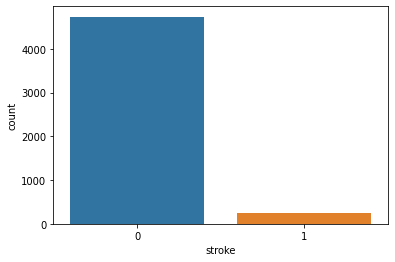

In [ ]:
# We can see our target value is inbalance
sns.countplot(df["stroke"]) # abnormal and normal
plt.show()


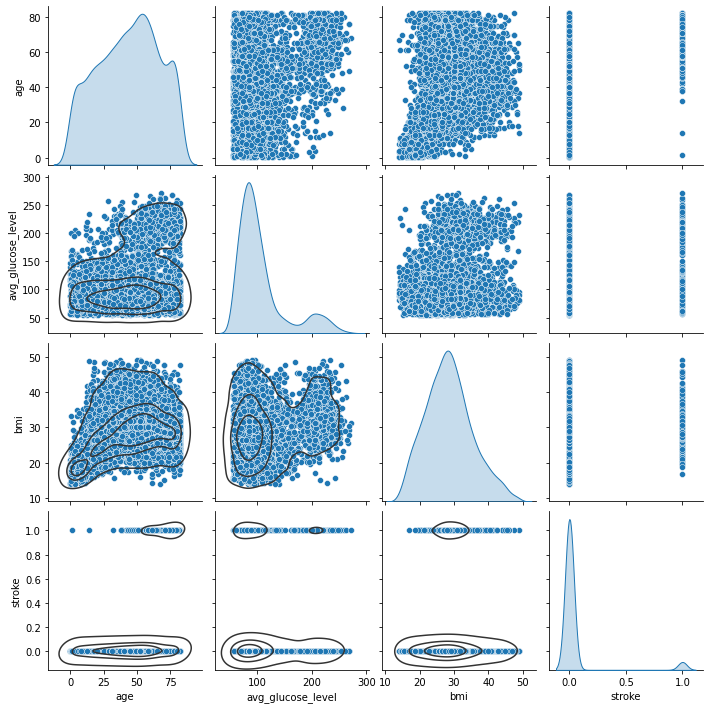

In [ ]:
# Engineering Numercal Features 
Attri = df[['age', 'avg_glucose_level', 'bmi', 'stroke']]
Attri.head()
g = sns.pairplot(Attri, diag_kind="kde")
g.map_lower(sns.kdeplot, levels=4, color=".2")


* At the age of greater than 60 years old there is a high risk to have stroke.
* Between 25 to 35 bmi have a high risk to have stroke.
* Between 50 to 100mg/l of average glucose 
on blood have a high risk to have stroke.



#### 2.4. Encodeed Features: 

In [ ]:
df['gender'] = df['gender'].map({'Female':1,'Male':0})
df['ever_married'] = df['ever_married'].map({'Yes': 1, 'No': 0})
df['Residence_type'] = df['Residence_type'].map({'Urban': 1, 'Rural':0})
#As these features don't have any order relationship so we do onehot encoding
df2 = pd.get_dummies(df,columns = ['work_type','smoking_status'])

df2.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0,67.0,0,1,1,1,228.69,36.6,1,0,1,0,0,0,1,0,0
1,0,80.0,0,1,1,0,105.92,32.5,1,0,1,0,0,0,0,1,0
2,1,49.0,0,0,1,1,171.23,34.4,1,0,1,0,0,0,0,0,1
3,1,79.0,1,0,1,0,174.12,24.0,1,0,0,1,0,0,0,1,0
4,0,81.0,0,0,1,1,186.21,29.0,1,0,1,0,0,0,1,0,0


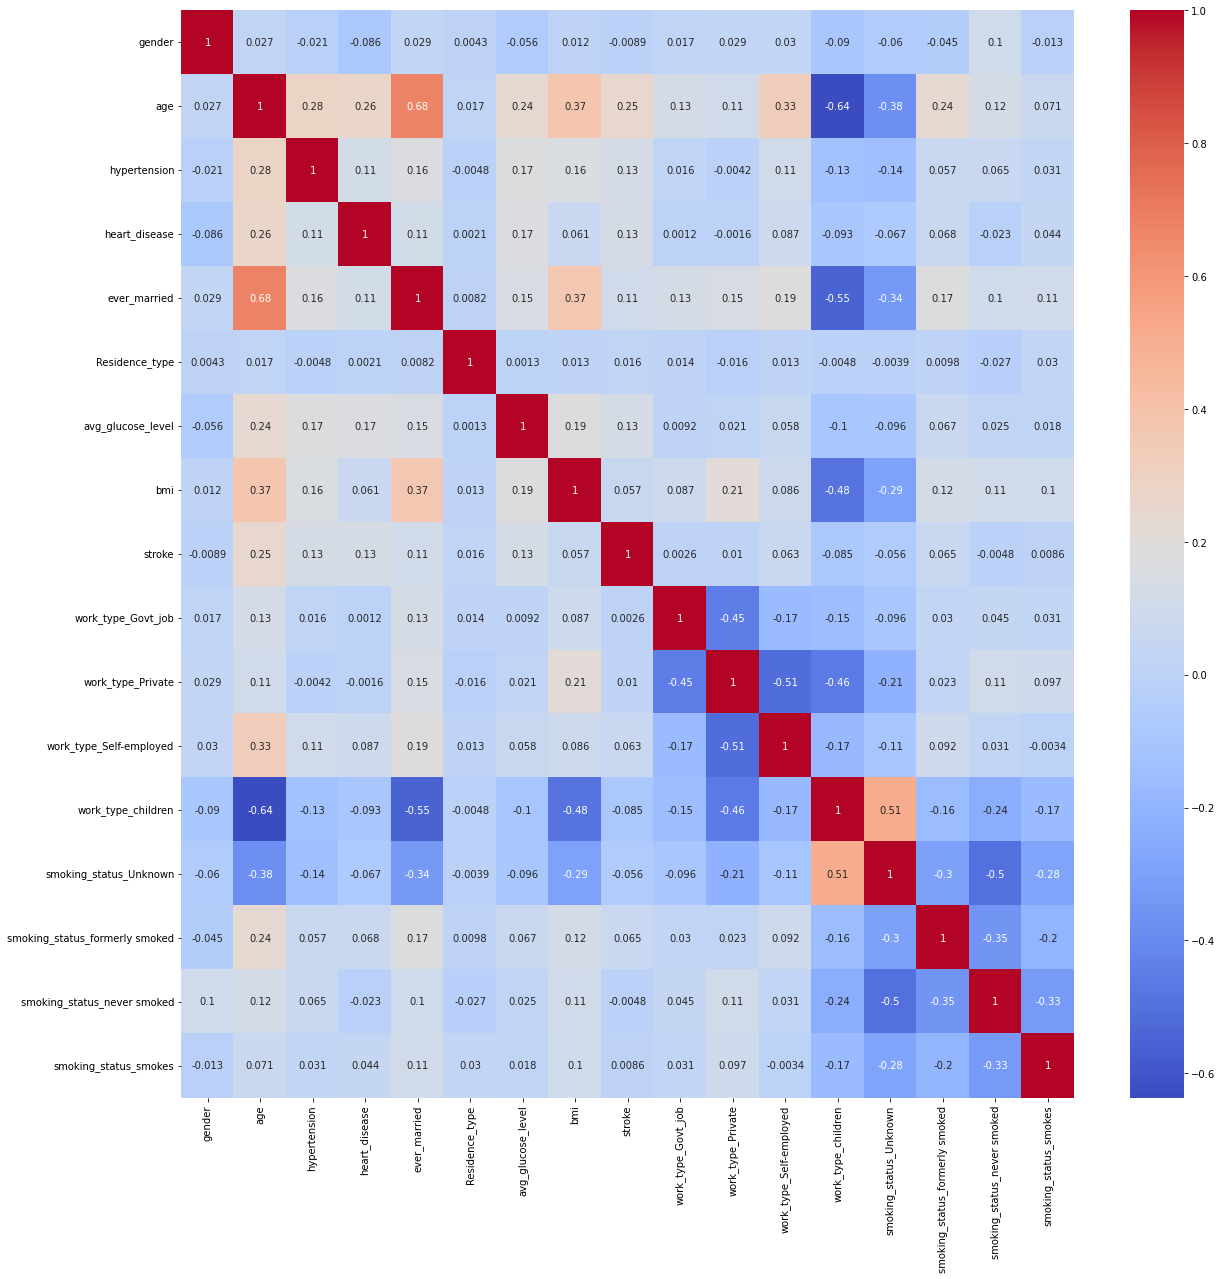

In [ ]:
#Heatmap for all variable
plt.figure(figsize=(20,20))
sns.heatmap(df2.corr(), annot = True, cmap = 'coolwarm')

#### 2.4. Spliting dataset first - Old version

In [ ]:
# Define Input and Target features
X1 = df2.drop('stroke', axis= 1)
y1 = df2['stroke']  
# Spliting data for cross validation
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.2, random_state = 20)

from sklearn.preprocessing import MinMaxScaler
scale = StandardScaler()
X1_train_scaled=pd.DataFrame(scale.fit_transform(X1_train),columns=X1_train.columns)
X1_test_scaled=pd.DataFrame(scale.fit_transform(X1_test),columns=X1_test.columns)
X1_train_scaled.shape, X1_test_scaled.shape, y1_train.shape, y1_test.shape

((3984, 16), (997, 16), (3984,), (997,))

In [ ]:

# Check the balance of Target Value 
origin = y1.value_counts()
print(origin)

oversample = RandomOverSampler(sampling_strategy='minority')
X1, y1 = oversample.fit_resample(X1_train, y1_train)
print(y1.value_counts())

0    4733
1     248
Name: stroke, dtype: int64
0    3791
1    3791
Name: stroke, dtype: int64


#### *2.4. Oversampling dataset first

In [ ]:
#Oversamplilng
sm = SMOTE(random_state=42)
X, y = sm.fit_resample(df2.drop('stroke', axis= 1),df2['stroke'])
print(y.value_counts())


1    4733
0    4733
Name: stroke, dtype: int64


((7572, 16), (1894, 16), (7572,), (1894,))

In [ ]:
# Spliting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)
from sklearn.preprocessing import MinMaxScaler
scale = StandardScaler()
X_train_scaled=pd.DataFrame(scale.fit_transform(X_train),columns=X_train.columns)
X_test_scaled=pd.DataFrame(scale.fit_transform(X_test),columns=X_test.columns)
X_train_scaled.shape, X_test_scaled.shape, y_train.shape, y_test.shape

((7572, 16), (1894, 16), (7572,), (1894,))

# 3. Model Training

#### 3.1. Decision Tree-Old version (Bad Roc results because of overfitting)

Train accuracy =  Accuracy score is 1.0
Test accuracy =  Accuracy score is 0.9157472417251755
Scaled_Train accuracy =  Accuracy score is 1.0
Scaled_Test accuracy =  Accuracy score is 0.9147442326980942
              precision    recall  f1-score   support

           0       0.95      0.96      0.95       942
           1       0.21      0.20      0.21        55

    accuracy                           0.91       997
   macro avg       0.58      0.58      0.58       997
weighted avg       0.91      0.91      0.91       997



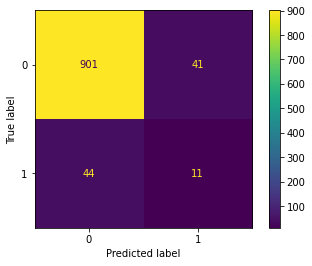

In [ ]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
dt = DecisionTreeClassifier()
dts = DecisionTreeClassifier()
dt.fit(X1_train,y1_train)
dts.fit(X1_train_scaled,y1_train)
# Function for Cross validation
def model_ev(actual,predict):
    
    accu = accuracy_score(actual,predict)
    print(f'Accuracy score is {accu}')
# Accuracy= (TP + TN) / (Total number of observation)
    


# Cross validation
y1_train_pred = dt.predict(X1_train)
print(f'Train accuracy = ', end = ' ')
model_ev(y1_train,y1_train_pred)
y1_test_pred = dt.predict(X1_test)
print(f'Test accuracy = ', end = ' ')
model_ev(y1_test,y1_test_pred)

# Cross validation -scaled
y1_train_pred = dts.predict(X1_train_scaled)
print(f'Scaled_Train accuracy = ', end = ' ')
model_ev(y1_train,y1_train_pred)
y1_test_pred = dts.predict(X1_test_scaled)
print(f'Scaled_Test accuracy = ', end = ' ')
model_ev(y1_test,y1_test_pred)

#Confusion Matrix
predictions = dts.predict(X1_test_scaled)
cm = confusion_matrix(y1_test, predictions, labels = dt.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = dt.classes_)
disp.plot()

clf_report = classification_report(y1_test, predictions)
print(clf_report)

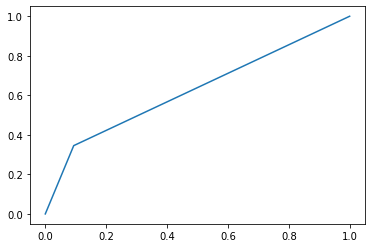

0.6260181432155955


In [ ]:
#ROC Curve
y1_pred_prob = dts.predict_proba(X1_test_scaled)[:,1]

fpr, tpr, thresholds = roc_curve(y1_test, y1_pred_prob)

plt.plot(fpr, tpr)
plt.show()

auc_roc = metrics.roc_auc_score(y1_test, y1_pred_prob)
print(auc_roc)


#### 3.1. Decision Tree

Train accuracy =  Accuracy score is 1.0
Test accuracy =  Accuracy score is 0.941921858500528
Scaled_Train accuracy =  Accuracy score is 1.0
Scaled_Test accuracy =  Accuracy score is 0.9028511087645196
              precision    recall  f1-score   support

           0       0.89      0.92      0.90       945
           1       0.91      0.89      0.90       949

    accuracy                           0.90      1894
   macro avg       0.90      0.90      0.90      1894
weighted avg       0.90      0.90      0.90      1894



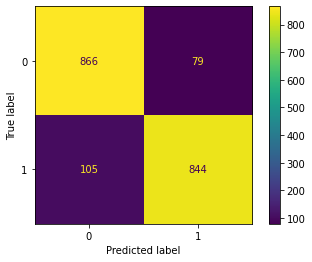

In [ ]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
dt = DecisionTreeClassifier()
dts = DecisionTreeClassifier()
dt.fit(X_train,y_train)
dts.fit(X_train_scaled,y_train)
# Function for Cross validation
def model_ev(actual,predict):
    
    accu = accuracy_score(actual,predict)
    print(f'Accuracy score is {accu}')
# Accuracy= (TP + TN) / (Total number of observation)
    


# Cross validation
y_train_pred = dt.predict(X_train)
print(f'Train accuracy = ', end = ' ')
model_ev(y_train,y_train_pred)
y_test_pred = dt.predict(X_test)
print(f'Test accuracy = ', end = ' ')
model_ev(y_test,y_test_pred)

# Cross validation -scaled
y_train_pred = dts.predict(X_train_scaled)
print(f'Scaled_Train accuracy = ', end = ' ')
model_ev(y_train,y_train_pred)
y_test_pred = dts.predict(X_test_scaled)
print(f'Scaled_Test accuracy = ', end = ' ')
model_ev(y_test,y_test_pred)

#Confusion Matrix
predictions = dts.predict(X_test_scaled)
cm = confusion_matrix(y_test, predictions, labels = dt.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = dt.classes_)
disp.plot()

clf_report = classification_report(y_test, predictions)
print(clf_report)


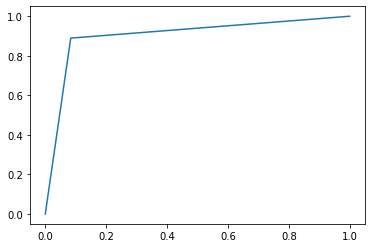

0.9028796672632289


In [ ]:
#ROC Curve
y_pred_prob = dts.predict_proba(X_test_scaled)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.plot(fpr, tpr)
plt.show()

auc_roc = metrics.roc_auc_score(y_test, y_pred_prob)
print(auc_roc)

#### 3.2. KNN-Old(Bad Roc results because of overfitting)

Training accuracy =  Accuracy score is 0.9508032128514057
Testing accuracy =  Accuracy score is 0.9368104312938816
Reached regularised model
Scaled Training accuracy =  Accuracy score is 0.9545682730923695
Scaled Testing accuracy =  Accuracy score is 0.9428284854563691
Reached regularised model
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       942
           1       0.00      0.00      0.00        55

    accuracy                           0.94       997
   macro avg       0.47      0.50      0.49       997
weighted avg       0.89      0.94      0.92       997



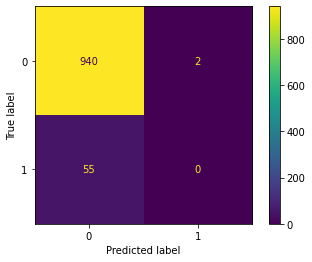

In [ ]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
knn = KNeighborsClassifier()
knns = KNeighborsClassifier()
knn.fit(X1_train,y1_train)
knns.fit(X1_train_scaled,y1_train)

# Cross validation
y1_train_pred = knn.predict(X1_train)
print(f'Training accuracy = ', end = ' ')
model_ev(y1_train,y1_train_pred)
y1_test_pred = knn.predict(X1_test)
print(f'Testing accuracy = ', end = ' ')
model_ev(y1_test,y1_test_pred)
print('Reached regularised model')

# Cross validation -scaled
y1_train_pred = knns.predict(X1_train_scaled)
print(f'Scaled Training accuracy = ', end = ' ')
model_ev(y1_train,y1_train_pred)
y1_test_pred = knns.predict(X1_test_scaled)
print(f'Scaled Testing accuracy = ', end = ' ')
model_ev(y1_test,y1_test_pred)
print('Reached regularised model')

#Confusion Matrix
predictions_2 = knns.predict(X1_test_scaled)
cm = confusion_matrix(y1_test, predictions_2, labels = dt.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = dt.classes_)
disp.plot()

clf_report = classification_report(y1_test, predictions_2)
print(clf_report)

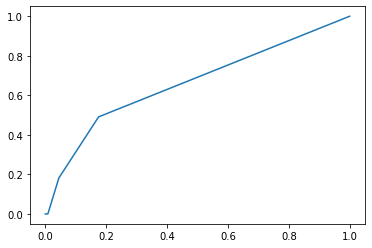

0.6620826095348389


In [ ]:
#ROC Curve
y1_pred_prob = knn.predict_proba(X1_test)[:,1]

fpr, tpr, thresholds = roc_curve(y1_test, y1_pred_prob)
plt.plot(fpr, tpr)
plt.show()

auc = metrics.roc_auc_score(y1_test, y1_pred_prob)
print(auc)

#### 3.2. KNN

Training accuracy =  Accuracy score is 0.9490227152667723
Testing accuracy =  Accuracy score is 0.9223864836325237
Reached regularised model
Scaled Training accuracy =  Accuracy score is 0.948230322239831
Scaled Testing accuracy =  Accuracy score is 0.9213305174234424
Reached regularised model
              precision    recall  f1-score   support

           0       1.00      0.84      0.91       945
           1       0.86      1.00      0.93       949

    accuracy                           0.92      1894
   macro avg       0.93      0.92      0.92      1894
weighted avg       0.93      0.92      0.92      1894



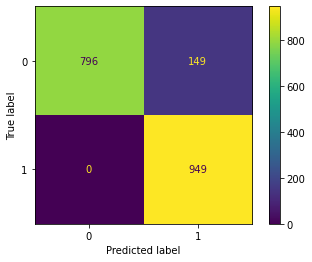

In [ ]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
knn = KNeighborsClassifier()
knns = KNeighborsClassifier()
knn.fit(X_train,y_train)
knns.fit(X_train_scaled,y_train)

# Cross validation
y_train_pred = knn.predict(X_train)
print(f'Training accuracy = ', end = ' ')
model_ev(y_train,y_train_pred)
y_test_pred = knn.predict(X_test)
print(f'Testing accuracy = ', end = ' ')
model_ev(y_test,y_test_pred)
print('Reached regularised model')

# Cross validation -scaled
y_train_pred = knns.predict(X_train_scaled)
print(f'Scaled Training accuracy = ', end = ' ')
model_ev(y_train,y_train_pred)
y_test_pred = knns.predict(X_test_scaled)
print(f'Scaled Testing accuracy = ', end = ' ')
model_ev(y_test,y_test_pred)
print('Reached regularised model')

#Confusion Matrix
predictions_2 = knns.predict(X_test_scaled)
cm = confusion_matrix(y_test, predictions_2, labels = dt.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = dt.classes_)
disp.plot()

clf_report = classification_report(y_test, predictions_2)
print(clf_report)


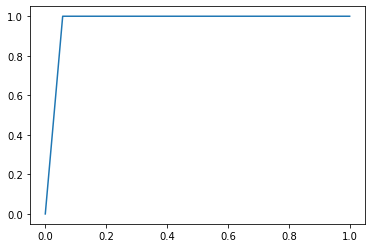

0.9714285714285714


In [ ]:
#ROC Curve
y_pred_prob = knn.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.show()

auc = metrics.roc_auc_score(y_test, y_pred_prob)
print(auc)

#### 3.3. Random Forest -Old (Bad Roc results because of overfitting)

Training accuracy =  Accuracy score is 1.0
Testing accuracy =  Accuracy score is 0.9448345035105316
Reached regularised model
Scaled Training accuracy =  Accuracy score is 1.0
Scaled Testing accuracy =  Accuracy score is 0.9438314944834504
Reached regularised model
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       942
           1       0.00      0.00      0.00        55

    accuracy                           0.94       997
   macro avg       0.47      0.50      0.49       997
weighted avg       0.89      0.94      0.92       997



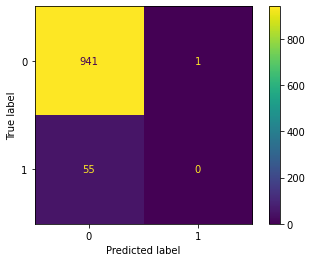

In [ ]:
# Random forest classifier
rf = RandomForestClassifier(random_state = 55)
rfs = RandomForestClassifier(random_state = 35)
rf.fit(X1_train,y1_train)
rfs.fit(X1_train_scaled,y1_train)

# Cross validation
y1_train_pred = rf.predict(X1_train)
print(f'Training accuracy = ', end = ' ')
model_ev(y1_train,y1_train_pred)
y1_test_pred = rf.predict(X1_test)
print(f'Testing accuracy = ', end = ' ')
model_ev(y1_test,y1_test_pred)
print('Reached regularised model')

# Cross validation -scaled
y1_train_pred = rfs.predict(X1_train_scaled)
print(f'Scaled Training accuracy = ', end = ' ')
model_ev(y1_train,y1_train_pred)
y1_test_pred = rfs.predict(X1_test_scaled)
print(f'Scaled Testing accuracy = ', end = ' ')
model_ev(y1_test,y1_test_pred)
print('Reached regularised model')

#Confusion Matrix
predictions_2 = rfs.predict(X1_test_scaled)
cm = confusion_matrix(y1_test, predictions_2)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()

clf_report = classification_report(y1_test, predictions_2)
print(clf_report)



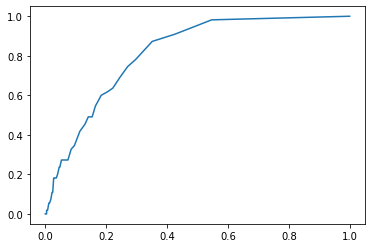

0.8138390272148235


In [ ]:
#ROC Curve
y1_pred_prob = rfs.predict_proba(X1_test_scaled)[:,1]

fpr, tpr, thresholds = roc_curve(y1_test, y1_pred_prob)
plt.plot(fpr, tpr)
plt.show()

auc = metrics.roc_auc_score(y1_test, y1_pred_prob)
print(auc)

#### 3.3. Random Forest 

Training accuracy =  Accuracy score is 1.0
Testing accuracy =  Accuracy score is 0.9873284054910243
Reached regularised model
Scaled Training accuracy =  Accuracy score is 1.0
Scaled Testing accuracy =  Accuracy score is 0.9403379091869061
Reached regularised model
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       945
           1       0.97      0.90      0.94       949

    accuracy                           0.94      1894
   macro avg       0.94      0.94      0.94      1894
weighted avg       0.94      0.94      0.94      1894



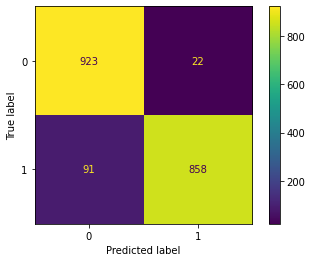

In [ ]:
# Random forest classifier
rf = RandomForestClassifier(random_state = 55)
rfs = RandomForestClassifier(random_state = 35)
rf.fit(X_train,y_train)
rfs.fit(X_train_scaled,y_train)

# Cross validation
y_train_pred = rf.predict(X_train)
print(f'Training accuracy = ', end = ' ')
model_ev(y_train,y_train_pred)
y_test_pred = rf.predict(X_test)
print(f'Testing accuracy = ', end = ' ')
model_ev(y_test,y_test_pred)
print('Reached regularised model')

# Cross validation -scaled
y_train_pred = rfs.predict(X_train_scaled)
print(f'Scaled Training accuracy = ', end = ' ')
model_ev(y_train,y_train_pred)
y_test_pred = rfs.predict(X_test_scaled)
print(f'Scaled Testing accuracy = ', end = ' ')
model_ev(y_test,y_test_pred)
print('Reached regularised model')

#Confusion Matrix
predictions_2 = rfs.predict(X_test_scaled)
cm = confusion_matrix(y_test, predictions_2)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()

clf_report = classification_report(y_test, predictions_2)
print(clf_report)



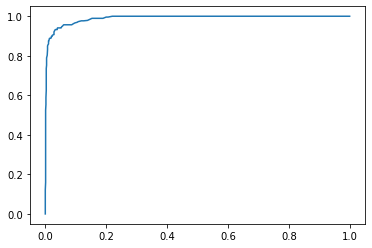

0.9896677650102308


In [ ]:
#ROC Curve
y_pred_prob = rfs.predict_proba(X_test_scaled)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.show()

auc = metrics.roc_auc_score(y_test, y_pred_prob)
print(auc)